# EDA & Pretreatment

### 1) opening data and libraries

In [26]:
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

In [3]:
print('version: ', mpl.__version__)
print('file dir: ', mpl.__file__)
print('config dir: ', mpl.get_configdir())
print('cache dir: ', mpl.get_cachedir())

version:  3.2.2
file dir:  C:\Users\youjin\anaconda3\lib\site-packages\matplotlib\__init__.py
config dir:  C:\Users\youjin\.matplotlib
cache dir:  C:\Users\youjin\.matplotlib


In [4]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [145]:
train = pd.read_csv("C:/data/movies/movies_train.csv")
test = pd.read_csv("C:/data/movies/movies_test.csv")
submission = pd.read_csv("C:/data/movies/submission.csv")

In [6]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


* screening_rat: the level of the screening
* dir_prev_bfnum: the number of audience of movies the director has made before the movie
* dir_prev_num: the number of movies the director has made before the movie
* box_off_num: the number of audience of the movie

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [16]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [19]:
len(train[(train['dir_prev_bfnum'].isnull() & (train['dir_prev_num'] == 0))])

330

* Here, 330 lines of dir_prev_bfnum should be 0 because the movies were the directors' first movie. 

In [14]:
train[train['dir_prev_bfnum'].isnull() == True].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [181]:
train = train.fillna(0)     # filling NaN with 0

In [22]:
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [23]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

### 2) divide by object and intiger

In [59]:
train_obj = train.select_dtypes(include = ['object']).copy()
train_num = train.select_dtypes(include = ['int64']).copy()

In [36]:
train_obj.columns

Index(['title', 'distributor', 'genre', 'release_time', 'screening_rat',
       'director'],
      dtype='object')

In [60]:
train_num.columns

Index(['time', 'dir_prev_num', 'num_staff', 'num_actor', 'box_off_num'], dtype='object')

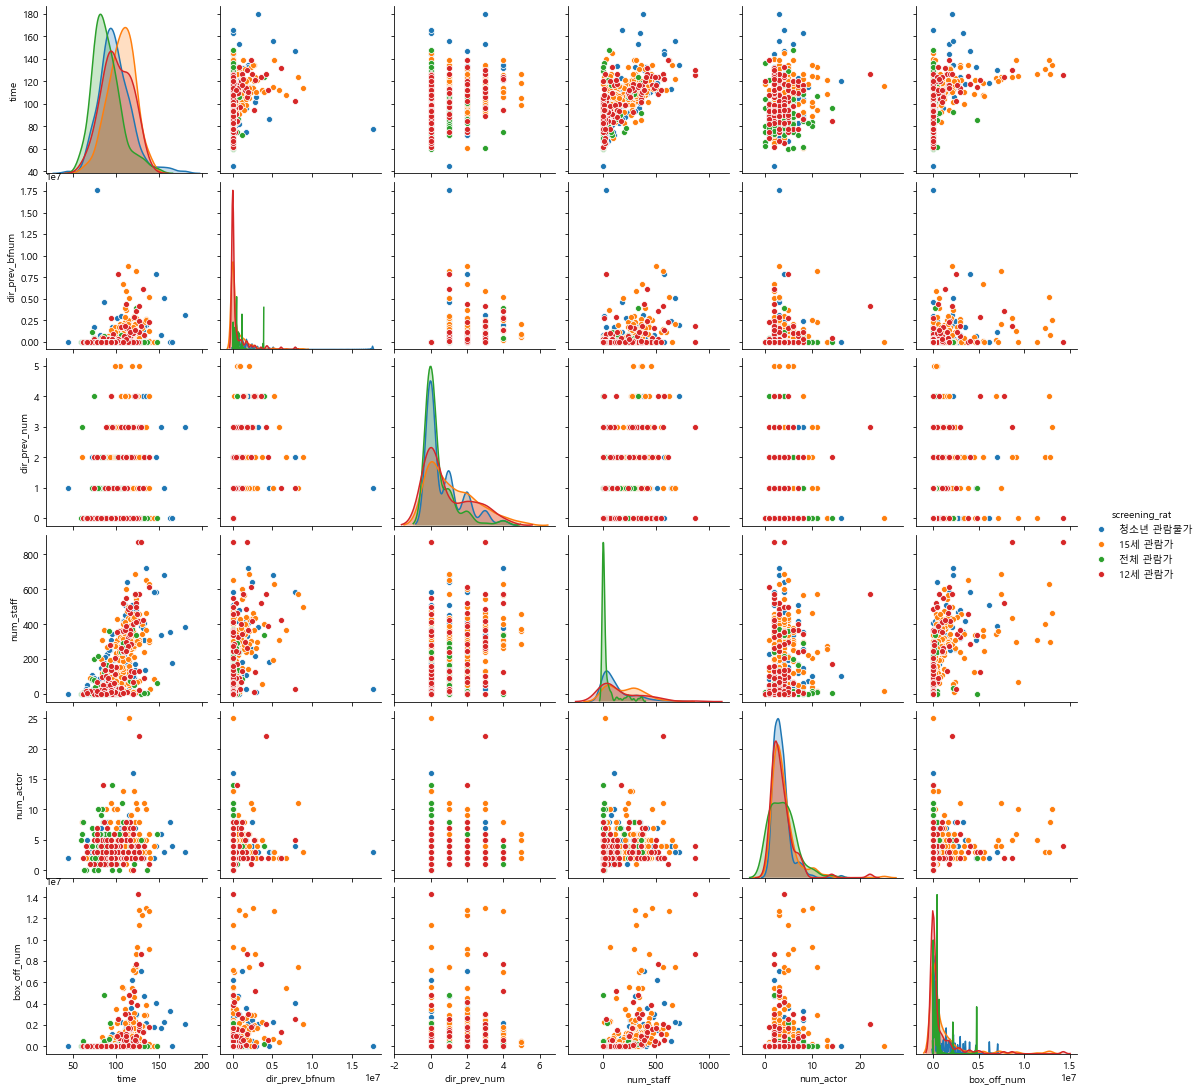

In [28]:
g = sns.pairplot(train, hue = 'screening_rat')

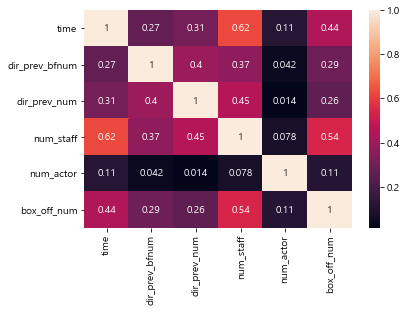

In [29]:
sns.heatmap(train.corr(), annot = True)

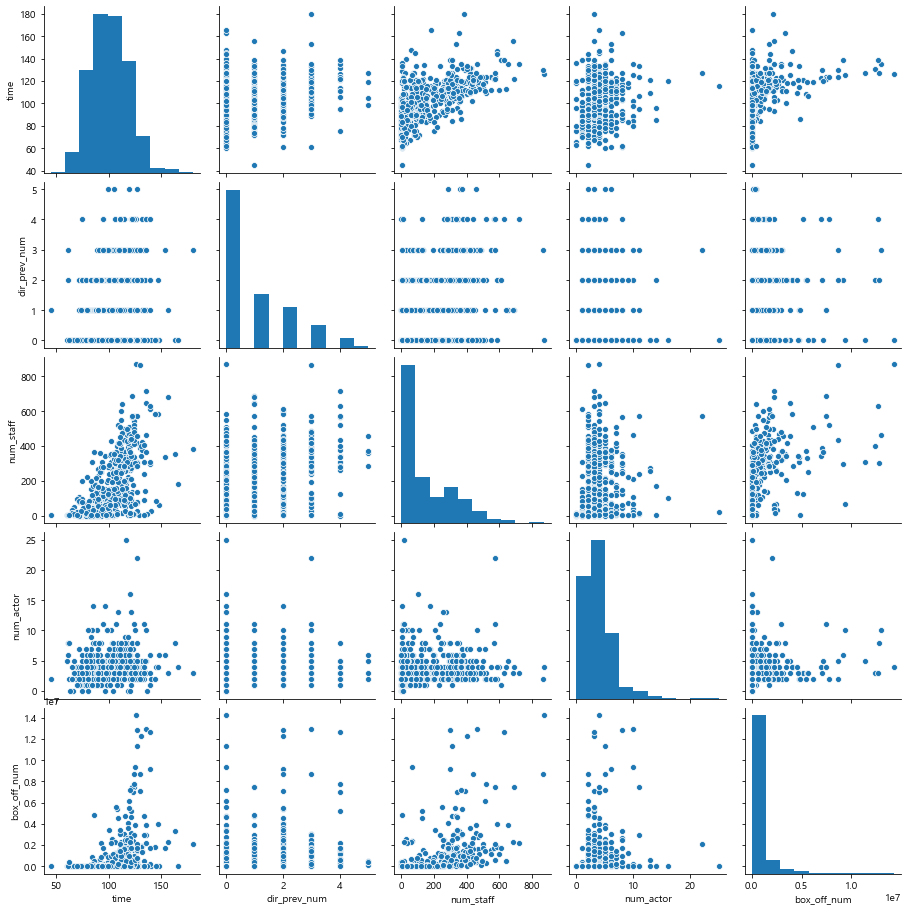

In [61]:
sns.pairplot(train_num)

# Modeling

* lightGBM(base model)
* k-fold lightGMB(k-fold model)
* feature engineering(fe)
* grid search(hyperparameter tuning)

### 1) single LightGBM

In [102]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

In [103]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [105]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [106]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=777, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [107]:
singleLGBM = submission.copy()

In [108]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [112]:
singleLGBM.head(10)

,title,box_off_num
0,용서는 없다,2817995.2
1,아빠가 여자를 좋아해,375377.2
2,하모니,-569324.3
3,의형제,1581189.0
4,평행 이론,-527780.6
5,회오리 바람,-292772.7
6,경계도시 2,-21290.5
7,이웃집 남자,3411.7
8,아마존의 눈물 극장판,-120173.6
9,반가운 살인자,3266359.4


This model is not accurate; you can see the reason from box_off_num feature. The number of audience can't be minus. I need to use some other prediction models to make the result better.

### 2) k-fold LightGBM

In [114]:
from sklearn.model_selection import KFold

In [116]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)
# n_splits = 5: split the data into 5 parts
# shuffle = True: randomly shuffle the data and do the split

In [119]:
for train_idx, val_idx in k_fold.split(X_train):
    print(train_idx, val_idx)
    break

[  0   1   2   3   4   5   6   7   8  10  11  13  14  15  16  17  19  20
  23  27  28  29  30  31  32  33  34  35  37  38  40  41  42  43  44  45
  48  49  50  51  53  57  58  59  60  61  62  63  64  65  66  67  68  70
  71  72  74  76  77  78  79  80  81  82  83  84  85  87  91  92  93  94
  95  98  99 100 102 103 104 105 107 108 109 110 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 133 136 137 138 139
 140 141 142 144 147 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 213 214 215 216 218 219
 220 221 223 224 225 226 227 228 229 230 231 232 233 237 238 239 240 242
 243 244 245 248 249 250 251 253 254 257 258 259 260 261 263 264 265 266
 268 270 271 272 274 276 277 278 279 280 282 285 286 288 292 294 295 296
 297 298 299 300 301 302 303 305 306 307 308 309 31

In [120]:
for train_idx, val_idx in k_fold.split(X_train):
    print(len(train_idx), len(val_idx))
    break

480 120


In [121]:
model = lgb.LGBMRegressor(random_state = 777, n_estimator = 1000)

models = []
# make a variable to put the 5 parts in

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.70572e+12
Did not meet early stopping. Best iteration is:
[6]	valid_0's l2: 2.45438e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.90847e+12
Did not meet early stopping. Best iteration is:
[33]	valid_0's l2: 3.72825e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.50344e+12
Did not meet early stopping. Best iteration is:
[8]	valid_0's l2: 2.58737e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.45977e+12
Did not meet early stopping. Best iteration is:
[11]	valid_0's l2: 1.26226e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.77214e+12
Did not meet early stopping. Best iteration is:
[22]	valid_0's l2: 1.57631e+12


* x_t, y_t : the training data
* eval_set : the evaluations(test) data
* early_stopping_rounds = 100 : While testing the data for 100 times, if the accuracy seems very similar to the previous steps of the modeling at some point, it automatically stops the modeling. 
* verbose = 100 : printing the result every 100 round

In [122]:
models

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=1000, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=777, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=1000, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=777, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0),
 LGBMRegressor(b

In [125]:
preds = []
for model in models:
    preds.append(model.predict(X_test))
    
len(preds)

5

In [126]:
preds

[array([3367422.08211024,  961138.88337016, 1097929.67851313,
        2097270.81999921,  781476.31131047,  123133.23396977,
          84085.01896248,  199222.92670303,  124854.97973097,
        1072684.78820647,  657040.55769984, 1644701.47160779,
         924735.72080619,  191699.58415836,  723218.39948755,
        2395613.42888462,  113180.54906592, 1882765.92812296,
          97286.47282983,  417270.42113431,  161482.3367577 ,
          63495.73363115,  598057.42337284,  249411.25868881,
         308424.71884273, 1319518.60852241,  202273.52740684,
        1076683.13768137,  491636.41945325,  183406.6380314 ,
        1740233.45816734,   86696.17528125,  440430.29773088,
        2040944.13061099,  113375.45695331,  531746.29484356,
         106207.35971699,  169560.79581187,  158101.0895316 ,
          95037.29701059,  466355.50624629,  197548.63265325,
         198810.0901353 ,  682743.4340129 ,  679265.22397749,
         617812.91125278,  219182.85833837,   83712.10602149,
        

In [124]:
kfoldLightGBM = submission.copy()

In [127]:
import numpy as np

In [128]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [131]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3


### 3) feature engineering

In [132]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [134]:
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

In [135]:
train.genre

0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object

In [146]:
# encoding the object feature(genre)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['genre'] = le.fit_transform(train['genre'])

In [147]:
test['genre'] = le.transform(test['genre'])
# I don't need to do le=preprocessing.LabelEncoder() again here because I need to use the same labeling for both of training data and test data

In [148]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int32

In [149]:
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int32

In [151]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [152]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [154]:
X_test

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,300529.0,2
1,113,4,275,3,342700.2,5
2,115,3,419,7,4206610.7,4
3,116,2,408,2,691342.0,10
4,110,1,380,1,31738.0,1
...,...,...,...,...,...,...
238,78,1,4,4,2590.0,4
239,86,0,18,2,nan,3
240,107,0,224,4,nan,2
241,102,1,68,7,50699.0,4


In [155]:
model = lgb.LGBMRegressor(random_state = 777, n_estimator = 1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.66646e+12
Did not meet early stopping. Best iteration is:
[9]	valid_0's l2: 2.42696e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 4.35145e+12
Did not meet early stopping. Best iteration is:
[22]	valid_0's l2: 3.95011e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.25406e+12
Did not meet early stopping. Best iteration is:
[14]	valid_0's l2: 2.53714e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.66671e+12
Did not meet early stopping. Best iteration is:
[14]	valid_0's l2: 1.22898e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 1.61787e+12
Did not meet early stopping. Best iteration is:
[24]	valid_0's l2: 1.5103e+12


In [156]:
preds = []
for model in models:
    preds.append(model.predict(X_test))

len(preds)

5

In [157]:
feLightGBM = submission.copy()

In [158]:
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)

In [159]:
feLightGBM.head(10)

,title,box_off_num
0,용서는 없다,3380329.5
1,아빠가 여자를 좋아해,818177.3
2,하모니,1068094.5
3,의형제,2238402.4
4,평행 이론,1041689.7
5,회오리 바람,109167.6
6,경계도시 2,118193.0
7,이웃집 남자,123191.0
8,아마존의 눈물 극장판,30106.2
9,반가운 살인자,689198.9


### 4) Grid Search

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

In [164]:
params = {'learning_rate' : [0.1,0.01,0.003],
         'min_child_samples' : [20,30]}

gs = GridSearchCV(estimator = model,
                 param_grid = params,
                 scoring = 'neg_mean_squared_error',
                 cv = k_fold)
# scoring: RMSE
# cv = k_fold: the sets of data

In [165]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=1000, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=777, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                    

In [166]:
gs.best_params_
# the best set of parameters

{'learning_rate': 0.003, 'min_child_samples': 30}

In [167]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000, learning_rate = 0.003, min_child_samples = 30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45571e+12
[300]	valid_0's l2: 2.42703e+12
[400]	valid_0's l2: 2.43413e+12
Early stopping, best iteration is:
[334]	valid_0's l2: 2.42418e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 4.89205e+12
[200]	valid_0's l2: 4.41023e+12
[300]	valid_0's l2: 4.19237e+12
[400]	valid_0's l2: 4.05786e+12
[500]	valid_0's l2: 3.96844e+12
[600]	valid_0's l2: 3.91559e+12
[700]	valid_0's l2: 3.88363e+12
[800]	valid_0's l2: 3.87481e+12
[900]	valid_0's l2: 3.86706e+12
[1000]	valid_0's l2: 3.86692e+12
Did not meet early stopping. Best iteration is:
[958]	valid_0's l2: 3.86562e+12
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.14399e+12
[200]	valid_0's l2: 2.79082e+12
[300]	valid_0's l2: 2.59034e+12
[400]	valid_0's l2: 2.47435e+12
[500]	valid_0's l2: 2.3988e+12
[600]	valid_0's l2: 2.35732e+12
[700]	valid_0's l2: 2.38484

In [168]:
preds = []
for model in models:
    preds.append(model.predict(X_test))

In [169]:
gs.best_score_

-2340502947855.249

In [170]:
gsLGBM = submission.copy()

In [171]:
gsLGBM['box_off_num'] = np.mean(preds, axis = 0)

In [172]:
gsLGBM.to_csv("C:/data/movies/gsLGBM.csv", index = False)

### 5) RandomForestRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [182]:
x = train[features]
y = train[target]

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2, shuffle = True)

In [184]:
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
model.fit(x_train,y_train)
model.feature_importances_

array([0.23010423, 0.05235661, 0.39788366, 0.07938852, 0.13304564,
       0.10722134])

In [185]:
y_pred = model.predict(x_test)

In [186]:
from sklearn.metrics import mean_squared_error

In [187]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

1441833.8083000358


In [190]:
test = test.fillna(0)
preds = model.predict(test[features])

In [191]:
preds

array([2.61652227e+06, 1.08016703e+06, 1.30159795e+06, 1.69726639e+06,
       1.42231533e+06, 1.07242783e+05, 2.26365740e+04, 7.28152300e+03,
       4.64689900e+04, 7.46657998e+05, 3.81631778e+05, 1.96492904e+06,
       1.93415872e+06, 8.25307300e+03, 5.48831852e+05, 3.33560591e+06,
       4.07460330e+04, 3.01861448e+06, 2.00971424e+05, 1.70071385e+05,
       2.67021890e+04, 1.91970520e+04, 1.07973152e+06, 5.69078194e+05,
       1.12968980e+05, 2.29633503e+06, 2.78033070e+03, 1.15169444e+06,
       9.12656850e+04, 1.80466690e+04, 2.94445397e+06, 1.49239100e+05,
       1.04079806e+05, 1.47062119e+06, 3.83358800e+03, 1.47629369e+05,
       1.37097460e+04, 6.61029900e+03, 1.21833430e+04, 3.96820300e+03,
       1.41526430e+04, 1.49511079e+05, 1.16343598e+05, 5.69516557e+05,
       1.31352801e+05, 9.80697625e+05, 1.23122500e+04, 1.41448331e+05,
       7.02916529e+05, 1.02930140e+04, 8.09387400e+03, 1.75966888e+06,
       4.78664120e+04, 1.20029039e+06, 1.03121803e+06, 1.77289971e+05,
      

In [192]:
rfregressor = submission.copy()

In [193]:
rfregressor['box_off_num'] = preds
rfregressor.to_csv("C:/data/movies/rfregressor.csv", index = False)